# Introduction

Zomato is a popular business in the restaurants space. It allows customer to search for restaurants based on their preferences. It also provides with food deliver services. The USP of Zomato is its reviews on restaurants.

Analysing this data, can help restaurants understand, what customer like and dislike about their restaurant and improve it. It also allows you to compare customer reviews and ratings of your competitior across location, cuisine and type of service provided. 

These information can be vital in understanding customer requirements when starting a new restaurant or trying to improve your own restaurant business.

In this notebook, we are using the Zomato Restaurants in Bangalore data from kaggle. The link to download the notebook is as below:

https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants

Though, there can be many other analysis done on this data,we will be using the reviews data to understand how NLP techniques can help make sense of the huge trove of data captured through Reviews.



### Imports
Importing Basic Libraries

In [98]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

#pd.options.display.max_colwidth=-1

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
#import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


import re





# Analysis/Modeling

## Load the Data

In [48]:
zomato_data=pd.read_csv("zomato.csv")
zomato_data.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19                   
1  https://www.zomato.com/bangalore/spice-elephant-banashankari?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwxODM3NTQ3NCwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19          
2  https://www.zomato.com/SanchurroBangalore?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwiMTgzNzU0NzQiLDU5MDkwLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19                             
3  https://www.zomato.com/bangalore/addhuri-udupi-bhojana-banashankari?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwiMTgzNzU0NzQiLCI1OTA5MCIsMTgzODI5NDQsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19   
4  https://www.zomato.com/bangalore/grand-village-basavanagudi?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwiMTgzNzU0NzQiLCI1OTA5MCIsIjE4MzgyOTQ0IiwxODIyNDY3NiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19           

                                                                                                      address  \
0  942, 21st Main Road, 2nd Stage, Banashankari, Bangalore                                                      
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th Block, Kathriguppe, 3rd Stage, Banashankari, Bangalore         
2  1112, Next to KIMS Medical College, 17th Cross, 2nd Stage, Banashankari, Bangalore                           
3  1st Floor, Annakuteera, 3rd Stage, Banashankari, Bangalore                                                   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Bazaar Main Road, Above Reliance Trends, Basavanagudi, Bangalore   

                    name online_order book_table   rate  votes  \
0  Jalsa                  Yes          Yes        4.1/5  775     
1  Spice Elephant         Yes          No         4.1/5  787     
2  San Churro Cafe        Yes          No         3.8/5  918     
3  Addhuri Udupi Bhojana  No           No         3.7/5  88      
4  Grand Village          No           No         3.8/5  166     

                              phone      location            rest_type  \
0  080 42297555\r\n+91 9743772233    Banashankari  Casual Dining         
1  080 41714161                      Banashankari  Casual Dining         
2  +91 9663487993                    Banashankari  Cafe, Casual Dining   
3  +91 9620009302                    Banashankari  Quick Bites           
4  +91 8026612447\r\n+91 9901210005  Basavanagudi  Casual Dining         

                                                                                             dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup         
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani   
2  Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza        
3  Masala Dosa                                                                                            
4  Panipuri, Gol Gappe                                                                                    

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese  800                          
1  Chinese, North Indian, Thai     800                          
2  Cafe, Mexican, Italian          800                          
3  South Indian, North Indian      300                          
4  North Indian, Rajasthani        600                          

                                                                                                                                                                  

In [49]:
zomato_data.shape

(51717, 17)

In [50]:
zomato_data['listed_in(type)'].value_counts()

Delivery              25942
Dine-out              17779
Desserts              3593 
Cafes                 1723 
Drinks & nightlife    1101 
Buffet                882  
Pubs and bars         697  
Name: listed_in(type), dtype: int64

We have 51K restaurant reviews in the data. For each restaurant, there is an reviews list containing the review rating and the review comments. Let us extract these into a seperate dataframe. Also, so that we do not lose the other restaurant information, let us create a new resturant ID. Also, let us filter out for restraurant which have "Buffet"

### Filter out "Buffet" Resturants

In [51]:
## Filter out all restaurants for Dine-Out
zomato_data=zomato_data[zomato_data['listed_in(type)']=='Buffet']
print(zomato_data.shape)
zomato_data['id']=zomato_data.index
#print(zomato_data.head())

(882, 17)


In [52]:
zomato_data.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19                   
1  https://www.zomato.com/bangalore/spice-elephant-banashankari?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwxODM3NTQ3NCwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19          
2  https://www.zomato.com/SanchurroBangalore?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwiMTgzNzU0NzQiLDU5MDkwLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19                             
3  https://www.zomato.com/bangalore/addhuri-udupi-bhojana-banashankari?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwiMTgzNzU0NzQiLCI1OTA5MCIsMTgzODI5NDQsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19   
4  https://www.zomato.com/bangalore/grand-village-basavanagudi?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwiMTgzNzU0NzQiLCI1OTA5MCIsIjE4MzgyOTQ0IiwxODIyNDY3NiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19           

                                                                                                      address  \
0  942, 21st Main Road, 2nd Stage, Banashankari, Bangalore                                                      
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th Block, Kathriguppe, 3rd Stage, Banashankari, Bangalore         
2  1112, Next to KIMS Medical College, 17th Cross, 2nd Stage, Banashankari, Bangalore                           
3  1st Floor, Annakuteera, 3rd Stage, Banashankari, Bangalore                                                   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Bazaar Main Road, Above Reliance Trends, Basavanagudi, Bangalore   

                    name online_order book_table   rate  votes  \
0  Jalsa                  Yes          Yes        4.1/5  775     
1  Spice Elephant         Yes          No         4.1/5  787     
2  San Churro Cafe        Yes          No         3.8/5  918     
3  Addhuri Udupi Bhojana  No           No         3.7/5  88      
4  Grand Village          No           No         3.8/5  166     

                              phone      location            rest_type  \
0  080 42297555\r\n+91 9743772233    Banashankari  Casual Dining         
1  080 41714161                      Banashankari  Casual Dining         
2  +91 9663487993                    Banashankari  Cafe, Casual Dining   
3  +91 9620009302                    Banashankari  Quick Bites           
4  +91 8026612447\r\n+91 9901210005  Basavanagudi  Casual Dining         

                                                                                             dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup         
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani   
2  Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza        
3  Masala Dosa                                                                                            
4  Panipuri, Gol Gappe                                                                                    

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese  800                          
1  Chinese, North Indian, Thai     800                          
2  Cafe, Mexican, Italian          800                          
3  South Indian, North Indian      300                          
4  North Indian, Rajasthani        600                          

                                                                                                                                                                  

###  Extract the reviews data 

In [53]:
reviews_data=zomato_data[['reviews_list','id']].reset_index(drop=True)
reviews_data['index']=reviews_data.index
review=reviews_data['reviews_list'][0]
print(review)

[('Rated 4.0', 'RATED\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.'), ('Rated 4.0', 'RATED\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\nCheers'), ('Rated 2.0', 'RATED\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this place is mostly visi

In [54]:
type(review)

str

The list of reviews are present as a string. 

###  Convert the reviews for each restaurant into a list of (rating,review) tuple

In [55]:
import ast
text = ast.literal_eval(review)

type(text)

list

In [56]:
reviews_data['reviews_list']=reviews_data['reviews_list'].apply(lambda x:ast.literal_eval(x))


The review is present as a list of (rating,review) tuple. 

###   Convert the list of (rating,review) to one row each

In [57]:
reviews = reviews_data['reviews_list'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()

In [58]:
reviews.head()

,index,variable,value
0,0,0,"(Rated 4.0, RATED\n A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.)"
1,1,0,"(Rated 4.0, RATED\n Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.)"
2,2,0,"(Rated 3.0, RATED\n Ambience is not that good enough and it's not a pocket friendly cafe and the quantity is not that good and desserts are too good enough ??..)"
3,3,0,"(Rated 4.0, RATED\n Great food and proper Karnataka style full meals. Been there twice and was fully satisfied.. Will give 5 stars if it's well managed............)"
4,4,0,"(Rated 4.0, RATED\n Very good restaurant in neighbourhood. Buffet system is properly arranged. Variety of dishes along with garba dance and puppet show. Good spread of desserts. Live paratha / Kulcha making)"


In [59]:
reviews=reviews[['index',"value"]]
reviews.columns=['index','reviews']
reviews.head()

,index,reviews
0,0,"(Rated 4.0, RATED\n A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.)"
1,1,"(Rated 4.0, RATED\n Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.)"
2,2,"(Rated 3.0, RATED\n Ambience is not that good enough and it's not a pocket friendly cafe and the quantity is not that good and desserts are too good enough ??..)"
3,3,"(Rated 4.0, RATED\n Great food and proper Karnataka style full meals. Been there twice and was fully satisfied.. Will give 5 stars if it's well managed............)"
4,4,"(Rated 4.0, RATED\n Very good restaurant in neighbourhood. Buffet system is properly arranged. Variety of dishes along with garba dance and puppet show. Good spread of desserts. Live paratha / Kulcha making)"


In [60]:
reviews[reviews['index']==0]

,index,reviews
0,0,"(Rated 4.0, RATED\n A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.)"
882,0,"(Rated 4.0, RATED\n I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\nCheers)"
1764,0,"(Rated 2.0, RATED\n Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this place is mostly visited by vegetarians. Anyways we ordered ala carte items which took ages to come. Food was ok ok. Definitely not visiting anymore.)"
2646,0,"(Rated 4.0, RATED\n We went here on a weekend and one of us had the buffet while two of us took Ala Carte. Firstly the ambience and service of this place is great! The buffet had a lot of items and the good was good. We had a Pumpkin Halwa intm the dessert which was amazing. Must try! The kulchas are great here. Cheers!)"
3528,0,"(Rated 5.0, RATED\n The best thing about the place is itÃÃÃÃÃÃÃÃs ambiance. Second best thing was yummy ? food. We try buffet and buffet food was not disappointed us.\nTest ?. ?? ?? ?? ?? ??\nQuality ?. ??????????.\nService: Staff was very professional and friendly.\n\nOverall experience was excellent.\n\nsubirmajumder85.wixsite.com)"
4410,0,"(Rated 5.0, RATED\n Great food and pleasant ambience. Expensive but Coll place to chill and relax......\n\nService is really very very good and friendly staff...\n\nFood : 5/5\nService : 5/5\nAmbience :5/5\nOverall :5/5)"
5292,0,"(Rated 4.0, RATED\n Good ambience with tasty food.\nCheese chilli paratha with Bhutta palak methi curry is a good combo.\nLemon Chicken in the starters is a must try item.\nEgg fried rice was also quite tasty.\nIn the mocktails, recommend ""Alice in Junoon"". Do not miss it.)"
6174,0,"(Rated 4.0, RATED\n You canÃÃÃÃÃÃÃÃt go wrong with Jalsa. Never been a fan of their buffet and thus always order alacarteÃÃÃÃÃÃÃÃ. Service at times can be on the slower side but food is worth the wait.)"
7056,0,"(Rated 5.0, RATED\n Overdelighted by the service and food provided at this place. A royal and ethnic atmosphere builds a strong essence of being in India and also the quality and taste of food is truly authentic. I would totally recommend to visit this place once.)"
7938,0,"(Rated 4.0, RATED\n The place is nice and comfortable. Food wise all jalea outlets maintain a good standard. The soya chaap was a standout dish. Clearly one of trademark dish as per me and a must try.\n\nThe only concern is the parking. It very congested and limited to just 5cars. The basement parking is very steep and makes it cumbersome)"


In [61]:
len(reviews_data.loc[reviews_data['id']==0,'reviews_list'].tolist()[0])

12

###   For each line, extract the ratings and the review

In [62]:
reviews['rating']=reviews['reviews'].apply(lambda x:x[0])
reviews['review_text']=reviews['reviews'].apply(lambda x:x[1])
reviews.head()

,index,reviews,rating,review_text
0,0,"(Rated 4.0, RATED\n A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.)",Rated 4.0,RATED\n A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.
1,1,"(Rated 4.0, RATED\n Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.)",Rated 4.0,RATED\n Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.
2,2,"(Rated 3.0, RATED\n Ambience is not that good enough and it's not a pocket friendly cafe and the quantity is not that good and desserts are too good enough ??..)",Rated 3.0,RATED\n Ambience is not that good enough and it's not a pocket friendly cafe and the quantity is not that good and desserts are too good enough ??..
3,3,"(Rated 4.0, RATED\n Great food and proper Karnataka style full meals. Been there twice and was fully satisfied.. Will give 5 stars if it's well managed............)",Rated 4.0,RATED\n Great food and proper Karnataka style full meals. Been there twice and was fully satisfied.. Will give 5 stars if it's well managed............
4,4,"(Rated 4.0, RATED\n Very good restaurant in neighbourhood. Buffet system is properly arranged. Variety of dishes along with garba dance and puppet show. Good spread of desserts. Live paratha / Kulcha making)",Rated 4.0,RATED\n Very good restaurant in neighbourhood. Buffet system is properly arranged. Variety of dishes along with garba dance and puppet show. Good spread of desserts. Live paratha / Kulcha making


###   Replace the word "rated " and "RATED\n" in rating and review_text respectively

In [63]:

reviews['rating']=reviews['rating'].apply(lambda x:re.sub("Rated ","",str(x)))


In [81]:
test="RATED\n I rated the restaurant badly because od the ambience"
re.sub("^(rated\n)","",test,flags=re.I) ## Removes only the rated in the beginning of the string

' I rated the restaurant badly because od the ambience'

In [65]:
reviews['review_text']=reviews['review_text'].apply(lambda x:re.sub("^(rated\n)","",x,flags=re.I))
reviews['review_text']=reviews['review_text'].apply(lambda x:x.strip())

###   Drop of the reviews columns and also convert "rating" to integer

In [66]:
reviews.drop(['reviews'],inplace=True,axis=1)

In [67]:
reviews['rating']=pd.to_numeric(reviews['rating'])


In [68]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42261 entries, 0 to 518887
Data columns (total 3 columns):
index          42261 non-null int64
rating         42261 non-null float64
review_text    42261 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


##   Text Cleaning

Let us look at another very popular library "spacy"

In [69]:
import spacy



The object “nlp” is used to create documents, access linguistic annotations and different nlp properties

In [86]:
nlp = spacy.load("en_core_web_sm")#, disable=['parser', 'ner']) #Loads the english model and we dont want prser or an ner so we will disable it





 **Let us go through Text Preprocessing using spacy for one review**

In [87]:
review_txt=reviews.iloc[0]['review_text']
review_txt

'A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.'

In [72]:
document = nlp(review_txt)#Convert into an Spacy Document

In [84]:
print([token for token in document]) ## Prints list of all tokens in the document

[A, beautiful, place, to, dine, in, ., The, interiors, take, you, back, to, the, Mughal, era, ., The, lightings, are, just, perfect, ., We, went, there, on, the, occasion, of, Christmas, and, so, they, had, only, limited, items, available, ., But, the, taste, and, service, was, not, compromised, at, all, ., The, only, complaint, is, that, the, breads, could, have, been, better, ., Would, surely, like, to, come, here, again, .]


In [85]:
print([token.text for token in document])

['A', 'beautiful', 'place', 'to', 'dine', 'in', '.', 'The', 'interiors', 'take', 'you', 'back', 'to', 'the', 'Mughal', 'era', '.', 'The', 'lightings', 'are', 'just', 'perfect', '.', 'We', 'went', 'there', 'on', 'the', 'occasion', 'of', 'Christmas', 'and', 'so', 'they', 'had', 'only', 'limited', 'items', 'available', '.', 'But', 'the', 'taste', 'and', 'service', 'was', 'not', 'compromised', 'at', 'all', '.', 'The', 'only', 'complaint', 'is', 'that', 'the', 'breads', 'could', 'have', 'been', 'better', '.', 'Would', 'surely', 'like', 'to', 'come', 'here', 'again', '.']


In [74]:
stopwords=spacy.lang.en.stop_words.STOP_WORDS
doc_cleaned=[token for token in document if  (token.text.lower() not in stopwords)]
print(doc_cleaned)

[beautiful, place, dine, ., interiors, Mughal, era, ., lightings, perfect, ., went, occasion, Christmas, limited, items, available, ., taste, service, compromised, ., complaint, breads, better, ., surely, like, come, .]


In [75]:
## Let us get POS tags of the words
pos_tags=[(token.text,token.pos_) for token in document if (token.text.lower() not in stopwords)]
print(pos_tags)

[('beautiful', 'ADJ'), ('place', 'NOUN'), ('dine', 'NOUN'), ('.', 'PUNCT'), ('interiors', 'NOUN'), ('Mughal', 'PROPN'), ('era', 'NOUN'), ('.', 'PUNCT'), ('lightings', 'NOUN'), ('perfect', 'ADJ'), ('.', 'PUNCT'), ('went', 'VERB'), ('occasion', 'NOUN'), ('Christmas', 'PROPN'), ('limited', 'VERB'), ('items', 'NOUN'), ('available', 'ADJ'), ('.', 'PUNCT'), ('taste', 'NOUN'), ('service', 'NOUN'), ('compromised', 'VERB'), ('.', 'PUNCT'), ('complaint', 'NOUN'), ('breads', 'NOUN'), ('better', 'ADJ'), ('.', 'PUNCT'), ('surely', 'ADV'), ('like', 'VERB'), ('come', 'VERB'), ('.', 'PUNCT')]


***Let us only extract Adjectives from the document***

In [76]:
adj=[token for token in document if (token.text.lower() not in stopwords) and token.pos_=="ADJ"]
print(adj)

[beautiful, perfect, available, better]


***Let us now lemmatise the document and remove space and punctuation and pronouns and numbers***

In [77]:
doc_cleaned=[token.lemma_ for token in document if (token.text not in stopwords) and token.pos_ not in ['PUNCT','SPACE',"PRON","NUM"]]
print(doc_cleaned)

['a', 'beautiful', 'place', 'dine', 'the', 'interior', 'Mughal', 'era', 'the', 'lighting', 'perfect', 'go', 'occasion', 'Christmas', 'limit', 'item', 'available', 'but', 'taste', 'service', 'compromise', 'the', 'complaint', 'bread', 'well', 'Would', 'surely', 'like', 'come']


###   Create a function to do all the cleaning steps and clean all the reviews

In [93]:
COUNT=0
def cleanText(text):
    global COUNT
    nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner']) 
    
    text=text.lower()
    
    document = nlp(text)
    
    doc_cleaned=[token.lemma_ for token in document if (token.text not in stopwords) and token.pos_ not in ['PUNCT','SPACE',"PRON","NUM"]]
    print(doc_cleaned)
    doc_cleaned=" ".join(doc_cleaned)
    #print(doc_cleaned)
    #print(doc_cleaned)
    COUNT=COUNT+1
    if COUNT%1000==0:
        print(COUNT)
    return doc_cleaned

In [60]:
reviews['cleaned_review']=reviews['review_text'].apply(lambda x:cleanText(x))

['beautiful', 'place', 'dine', 'in.the', 'interior', 'mughal', 'era', 'lighting', 'perfect.we', 'go', 'occasion', 'christmas', 'limit', 'item', 'available', 'taste', 'service', 'compromise', 'all.the', 'complaint', 'bread', 'better.would', 'surely', 'like', 'come']
beautiful place dine in.the interior mughal era lighting perfect.we go occasion christmas limit item available taste service compromise all.the complaint bread better.would surely like come
['dinner', 'family', 'turn', 'good', 'choose', 'suitable', 'age', 'people', 'try', 'place', 'like', 'starter', 'service', 'good', 'price', 'affordable', 'recommend', 'restaurant', 'early', 'dinner', 'place', 'little', 'noisy']
dinner family turn good choose suitable age people try place like starter service good price affordable recommend restaurant early dinner place little noisy
['ambience', 'good', 'pocket', 'friendly', 'cafe', 'quantity', 'good', 'dessert', 'good']
ambience good pocket friendly cafe quantity good dessert good
['great'

['want', 'nice', 'quiet', 'ambience', 'food', 'good', 'love', 'soup', 'disappoint', 'dessert', 'order', 'litchi', 'rasgulla', 'dessert', 'great', 'concept', 'sweet', 'rasgulla', 'dry', 'look', 'beautiful']
want nice quiet ambience food good love soup disappoint dessert order litchi rasgulla dessert great concept sweet rasgulla dry look beautiful
['itã\x83\x83ã\x82\x83ã\x83\x82ã\x82\x82ã\x83\x83ã\x82\x82ã\x83\x82ã\x82\x92s', 'good', 'place', 'suggest', 'wonderful', 'place', 'hear', 'place', 'time', 'finally', 'get', 'chance', 'visit']
itããããããããs good place suggest wonderful place hear place time finally get chance visit
['try', 'chicken', 'ghee', 'roast', 'chicken', 'biryani', 'biryani', 'average', 'ghee', 'roast', 'chicken', 'hard', 'chewy', 'overall', 'average', 'place', 'consider', 'food', 'ambience', 'good', 'staff', 'pleasant']
try chicken ghee roast chicken biryani biryani average ghee roast chicken hard chewy overall average place consider food ambience good staf

['enjoy', 'buffet', 'spread', 'reasonably', 'price', 'polite', 'service', 'ala', 'carte', 'highly', 'price', 'guess', 'work', 'buffet', 'option']
enjoy buffet spread reasonably price polite service ala carte highly price guess work buffet option
['view', 'good', 'paneer', 'dish', 'fresh', 'tasty', 'biryani', 'good', 'spice', 'level', 'medium', 'service', 'well', 'food', 'ambience-', 'service-3/5']
view good paneer dish fresh tasty biryani good spice level medium service well food ambience- service-3/5
['delightful', 'starter', 'tasty', 'mock', 'tail', 'find', 'place', 'unfortunately', 'menu', 'available', 'unavailability', 'issue', 'find', 'parking', 'spot', 'issue', 'plan', 'properly']
delightful starter tasty mock tail find place unfortunately menu available unavailability issue find parking spot issue plan properly
['place', 'local', 'like', 'polished', 'dinner', 'buffet', 'variety', 'starter', 'sweet', 'specially', 'foreigner', 'spice', 'mistake', 'star', 'hotel', 'nice', 'ambience

KeyboardInterrupt: 

In [55]:
reviews.to_csv("zomato_buffet_cleaned.csv",index=False)

In [56]:
reviews.head()

,index,rating,review_text,cleaned_review
0,0,4.0,A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.,beautiful place dine in.the interior mughal era lighting perfect.we go occasion christmas limit item available taste service compromise all.the complaint bread better.would surely like come
1,1,4.0,Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.,dinner family turn good choose suitable age people try place like starter service good price affordable recommend restaurant early dinner place little noisy
2,2,3.0,Ambience is not that good enough and it's not a pocket friendly cafe and the quantity is not that good and desserts are too good enough ??..,ambience good pocket friendly cafe quantity good dessert good
3,3,4.0,Great food and proper Karnataka style full meals. Been there twice and was fully satisfied.. Will give 5 stars if it's well managed............,great food proper karnataka style meal twice fully satisfied star manage
4,4,4.0,Very good restaurant in neighbourhood. Buffet system is properly arranged. Variety of dishes along with garba dance and puppet show. Good spread of desserts. Live paratha / Kulcha making,good restaurant neighbourhood buffet system properly arrange variety dish garba dance puppet good spread dessert live paratha / kulcha making


**There are still some punctuation marks. let us use regex and remove them. This may be because there was no space between the words**

In [212]:
import string
def removePunct(text):
    text = text.translate(str.maketrans({key: " {0} ".format(key) for key in string.punctuation}))
    
    text_cleaned="".join([x for x in text if x not in string.punctuation])
    text_cleaned=re.sub(r'[^\x00-\x7F]+',' ', text_cleaned) ## Remove Ascii Characters
    text_cleaned=re.sub('\s+', ' ', text_cleaned).strip()
    return text_cleaned

In [213]:
reviews['cleaned_review']=reviews['cleaned_review'].apply(lambda x:removePunct(x))
reviews.head()

,index,rating,review_text,cleaned_review,rating_category
0,0,4.0,A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.,beautiful place dine in the interior mughal era lighting perfect we go occasion christmas limit item available taste service compromise all the complaint bread better would surely like come,positive
1,1,4.0,Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.,dinner family turn good choose suitable age people try place like starter service good price affordable recommend restaurant early dinner place little noisy,positive
2,2,3.0,Ambience is not that good enough and it's not a pocket friendly cafe and the quantity is not that good and desserts are too good enough ??..,ambience good pocket friendly cafe quantity good dessert good,neutral
3,3,4.0,Great food and proper Karnataka style full meals. Been there twice and was fully satisfied.. Will give 5 stars if it's well managed............,great food proper karnataka style meal twice fully satisfied star manage,positive
4,4,4.0,Very good restaurant in neighbourhood. Buffet system is properly arranged. Variety of dishes along with garba dance and puppet show. Good spread of desserts. Live paratha / Kulcha making,good restaurant neighbourhood buffet system properly arrange variety dish garba dance puppet good spread dessert live paratha kulcha making,positive


##   Understanding the Reviews

###  What is the distribution of Ratings?

In [214]:
reviews['rating'].value_counts()

4.0    14837
5.0    13088
3.0    5626 
1.0    2505 
2.0    1851 
4.5    1669 
3.5    1653 
2.5    615  
1.5    417  
Name: rating, dtype: int64

There are too many categories. Let us simplify it

###  Let us create a new rating category - Positive, Neutral and Negative. 

Anythin below 3 is negative, 3 is neutral and above 3 is positive

In [215]:
def getRatingCategory(rating):
    if rating<3:
        return "negative"
    elif rating>3:
        return "positive"
    else:
        return "neutral"

In [216]:
reviews['rating_category']=reviews['rating'].apply(lambda x:getRatingCategory(x))

In [217]:
reviews.head()

,index,rating,review_text,cleaned_review,rating_category
0,0,4.0,A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.,beautiful place dine in the interior mughal era lighting perfect we go occasion christmas limit item available taste service compromise all the complaint bread better would surely like come,positive
1,1,4.0,Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.,dinner family turn good choose suitable age people try place like starter service good price affordable recommend restaurant early dinner place little noisy,positive
2,2,3.0,Ambience is not that good enough and it's not a pocket friendly cafe and the quantity is not that good and desserts are too good enough ??..,ambience good pocket friendly cafe quantity good dessert good,neutral
3,3,4.0,Great food and proper Karnataka style full meals. Been there twice and was fully satisfied.. Will give 5 stars if it's well managed............,great food proper karnataka style meal twice fully satisfied star manage,positive
4,4,4.0,Very good restaurant in neighbourhood. Buffet system is properly arranged. Variety of dishes along with garba dance and puppet show. Good spread of desserts. Live paratha / Kulcha making,good restaurant neighbourhood buffet system properly arrange variety dish garba dance puppet good spread dessert live paratha kulcha making,positive


Text(0.5,1,'Distribution of Reviews Category')

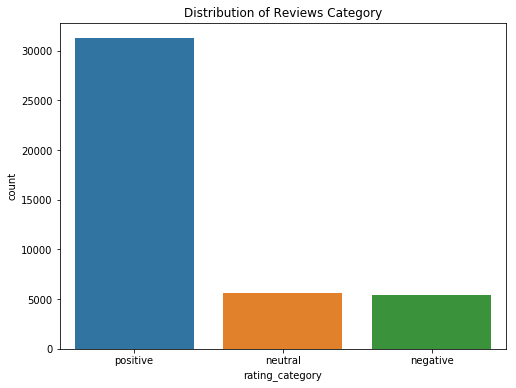

In [218]:
sns.countplot(reviews['rating_category']).set_title("Distribution of Reviews Category")

majority of the reviews are positive.
###  Let us now look at what are the common words used in positive and negative reviews

####   First extract positive and negative reviews into seperate variables

In [219]:
from collections import Counter 


In [220]:
positive_reviews=reviews.loc[reviews['rating_category']=='positive','cleaned_review'].tolist()
positive_reviews[0:5]

['beautiful place dine in the interior mughal era lighting perfect we go occasion christmas limit item available taste service compromise all the complaint bread better would surely like come',
 'dinner family turn good choose suitable age people try place like starter service good price affordable recommend restaurant early dinner place little noisy',
 'great food proper karnataka style meal twice fully satisfied star manage',
 'good restaurant neighbourhood buffet system properly arrange variety dish garba dance puppet good spread dessert live paratha kulcha making',
 'awesome food great servicefriendly staffsgood quality food complimentary breakfast honey lemon chicken chicken manchow soup perfect place stay family stay bangalore']

In [221]:
negative_reviews=reviews.loc[reviews['rating_category']=='negative','cleaned_review'].tolist()
negative_reviews[0:5]

['okay like start say restaurant team unorganized worker order food online boneless biryani receive mutton biryani call say tell send receive payment care horrible service biryani taste good service',
 'visit place night dinner party place cozy design like ambience staff courteous buffet menu veg non veg starter veg non veg soup starter okish main course roti rice chow mien gravy sufficient option choose main course desert lack taste service item warm enjoy wait item need replenish quirky item photo booth new restaurant hope visit',
 'look ab find hard time maintain niche create exp joint absolute sense plate table dirty glass come food taste feel like repeat chef come ask feedback honest change work right flavour satisfy extra attentiveness apologetic service make quick modification mood set half hunger go toss hope exp well start',
 'go today impromptu lunch buffet booking wait good min seat manager steward show table service expect introduce concept menu little clueless go ahead ask

####   Tokenise the words and use Counter to keep count of words

In [222]:
test_string="the place was great and I enjoyed being in that place awesome great food"

In [223]:
tokenised_string=test_string.split(" ")
print(tokenised_string)

['the', 'place', 'was', 'great', 'and', 'I', 'enjoyed', 'being', 'in', 'that', 'place', 'awesome', 'great', 'food']


In [224]:
test_counter=Counter(tokenised_string)
test_counter


Counter({'the': 1,
         'place': 2,
         'was': 1,
         'great': 2,
         'and': 1,
         'I': 1,
         'enjoyed': 1,
         'being': 1,
         'in': 1,
         'that': 1,
         'awesome': 1,
         'food': 1})

In [225]:
test_counter.most_common(2)

[('place', 2), ('great', 2)]

**Let us put the above into a function. To use it, we will have to concatenate all the postive reviews as one string and all negative reviews as another**

In [226]:
def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn)
    

In [227]:
top_20_positive_review_words=getMostCommon(positive_reviews,20)

In [228]:
top_20_positive_review_words

[('good', 37180),
 ('food', 30654),
 ('place', 29353),
 ('service', 14751),
 ('ambience', 12642),
 ('great', 10885),
 ('buffet', 10363),
 ('visit', 10200),
 ('try', 9857),
 ('chicken', 8610),
 ('staff', 8306),
 ('love', 8011),
 ('starter', 7688),
 ('taste', 7527),
 ('nice', 7434),
 ('time', 7038),
 ('veg', 6993),
 ('restaurant', 6779),
 ('like', 6742),
 ('order', 6545)]

In [229]:
top_20_negative_review_words=getMostCommon(negative_reviews,20)

In [230]:
top_20_negative_review_words

[('food', 5838),
 ('place', 3656),
 ('good', 3538),
 ('service', 2720),
 ('bad', 2700),
 ('buffet', 2169),
 ('order', 2093),
 ('serve', 1698),
 ('restaurant', 1557),
 ('chicken', 1508),
 ('taste', 1491),
 ('time', 1477),
 ('visit', 1466),
 ('like', 1411),
 ('go', 1378),
 ('experience', 1315),
 ('veg', 1258),
 ('ambience', 1256),
 ('starter', 1233),
 ('staff', 1029)]

In [231]:
neg_words=[val[0] for val in top_20_negative_review_words]
pos_words=[val[0] for val in top_20_positive_review_words]

set(neg_words) - set(pos_words)

{'bad', 'experience', 'go', 'serve'}

In [232]:
set(pos_words) - set(neg_words)

{'great', 'love', 'nice', 'try'}

There are a few common words as well when we consider unigrams. Let us plot this as a bar plot.

####   Plotting the Top 50 most common words in negative and positive words

In [233]:
def plotMostCommonWords(reviews_list,topn=50,title="Positive Review",color="blue",axis=None):
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

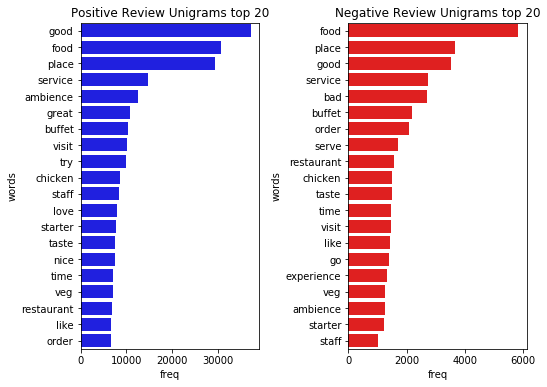

In [234]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews,20,"Positive Review Unigrams",axis=ax[0])

plotMostCommonWords(negative_reviews,20,"Negative Review Unigrams",color="red",axis=ax[1])




**Some takeaways from the Unigram plot**

1. "Starters","Ambience", "Service" and the "Staff" impact the reviews - they are present in both positive and negative reviews
2. Words like "great", "love" are present in postive reviews and are not there in the negative ones
3. Words like "bad","experince" are present in negative reviews and not there in positive reviews.
4. Top 20 Unigrams on their own are not enough to distinguish between good vs bad reviews.

####   Dive into the Bigrams

So far we considered only each word as a token. Instead we will now have consecutive pair of words. These are known as bigrams

If we consider n contiguos words it becomes an n-gram

With Bigrams, if "bad" and "experience" occur very frequently togther we will be able to get "bad experience" as a very frequent word

In [235]:
test_review=negative_reviews[0]
test_review

'okay like start say restaurant team unorganized worker order food online boneless biryani receive mutton biryani call say tell send receive payment care horrible service biryani taste good service'

In [236]:
test_tokens=test_review.split(" ")
[test_tokens[i:] for i in range(2)]

[['okay',
  'like',
  'start',
  'say',
  'restaurant',
  'team',
  'unorganized',
  'worker',
  'order',
  'food',
  'online',
  'boneless',
  'biryani',
  'receive',
  'mutton',
  'biryani',
  'call',
  'say',
  'tell',
  'send',
  'receive',
  'payment',
  'care',
  'horrible',
  'service',
  'biryani',
  'taste',
  'good',
  'service'],
 ['like',
  'start',
  'say',
  'restaurant',
  'team',
  'unorganized',
  'worker',
  'order',
  'food',
  'online',
  'boneless',
  'biryani',
  'receive',
  'mutton',
  'biryani',
  'call',
  'say',
  'tell',
  'send',
  'receive',
  'payment',
  'care',
  'horrible',
  'service',
  'biryani',
  'taste',
  'good',
  'service']]

In [97]:
tuple(zip(("New","San","Bang"),("York","Fransico")))

(('New', 'York'), ('San', 'Fransico'))

In [237]:
tuple(zip(*[test_tokens[i:] for i in range(2)]))

(('okay', 'like'),
 ('like', 'start'),
 ('start', 'say'),
 ('say', 'restaurant'),
 ('restaurant', 'team'),
 ('team', 'unorganized'),
 ('unorganized', 'worker'),
 ('worker', 'order'),
 ('order', 'food'),
 ('food', 'online'),
 ('online', 'boneless'),
 ('boneless', 'biryani'),
 ('biryani', 'receive'),
 ('receive', 'mutton'),
 ('mutton', 'biryani'),
 ('biryani', 'call'),
 ('call', 'say'),
 ('say', 'tell'),
 ('tell', 'send'),
 ('send', 'receive'),
 ('receive', 'payment'),
 ('payment', 'care'),
 ('care', 'horrible'),
 ('horrible', 'service'),
 ('service', 'biryani'),
 ('biryani', 'taste'),
 ('taste', 'good'),
 ('good', 'service'))

In [238]:
def generateNGram(text,n=2):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [239]:
positive_reviews_bigrams=[" ".join(generateNGram(review)) for review in positive_reviews]
negative_reviews_bigrams=[" ".join(generateNGram(review)) for review in negative_reviews]


In [240]:
positive_reviews_bigrams[0:5]

['beautiful_place place_dine dine_in in_the the_interior interior_mughal mughal_era era_lighting lighting_perfect perfect_we we_go go_occasion occasion_christmas christmas_limit limit_item item_available available_taste taste_service service_compromise compromise_all all_the the_complaint complaint_bread bread_better better_would would_surely surely_like like_come',
 'dinner_family family_turn turn_good good_choose choose_suitable suitable_age age_people people_try try_place place_like like_starter starter_service service_good good_price price_affordable affordable_recommend recommend_restaurant restaurant_early early_dinner dinner_place place_little little_noisy',
 'great_food food_proper proper_karnataka karnataka_style style_meal meal_twice twice_fully fully_satisfied satisfied_star star_manage',
 'good_restaurant restaurant_neighbourhood neighbourhood_buffet buffet_system system_properly properly_arrange arrange_variety variety_dish dish_garba garba_dance dance_puppet puppet_good g

####   Get the top 20 most frequent bigrams in positive and negative reviews

In [241]:
top_20_positive_bigrams=getMostCommon(positive_reviews_bigrams,topn=20)
top_20_positive_bigrams

[('main_course', 4469),
 ('food_good', 3374),
 ('good_place', 2724),
 ('visit_place', 2619),
 ('non_veg', 2581),
 ('good_food', 2341),
 ('service_good', 1878),
 ('good_service', 1742),
 ('it_s', 1408),
 ('ambience_good', 1354),
 ('food_service', 1353),
 ('value_money', 1338),
 ('place_good', 1271),
 ('taste_good', 1269),
 ('nice_place', 1269),
 ('ice_cream', 1266),
 ('veg_non', 1074),
 ('good_ambience', 1057),
 ('north_indian', 1045),
 ('great_place', 994)]

In [242]:
top_20_negative_bigrams=getMostCommon(negative_reviews_bigrams,topn=20)

In [243]:
top_20_negative_bigrams

[('main_course', 679),
 ('non_veg', 602),
 ('visit_place', 460),
 ('food_good', 391),
 ('bad_experience', 372),
 ('ice_cream', 294),
 ('quality_food', 275),
 ('lunch_buffet', 274),
 ('ambience_good', 271),
 ('food_quality', 268),
 ('bad_service', 262),
 ('service_bad', 233),
 ('food_average', 218),
 ('waste_money', 213),
 ('good_service', 210),
 ('veg_starter', 208),
 ('food_serve', 206),
 ('bad_food', 197),
 ('good_thing', 196),
 ('food_service', 193)]

####  Plotting the top 20 Bigrams for Positive and Negative Reviews

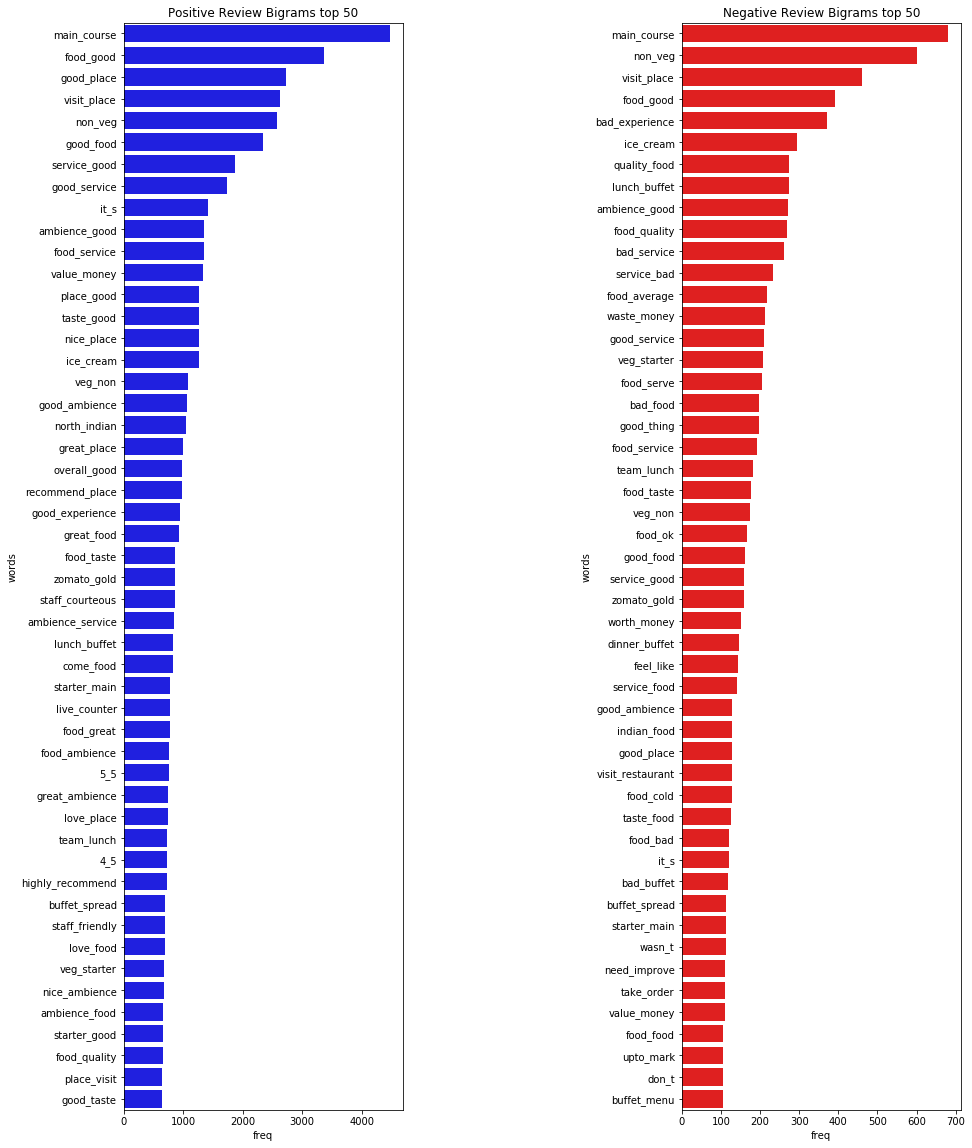

In [249]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews_bigrams,50,"Positive Review Bigrams",axis=ax[0])

plotMostCommonWords(negative_reviews_bigrams,50,"Negative Review Bigrams",color="red",axis=ax[1])


**Key Takeaways from Bigrams**
1. While positive reviews talk about "value_money", negative reviews talk about "waste_money". Positive Reviews talk about "good service", negative reviews talk about "bad service".



### Collocations 

From simple bigrams, we may not always end up with useful bigrams. 

Collocation is a phrase consisting of more than one word but these words more commonly co-occur in a given context than its individual word parts. 

For example: non_veg is a more useful and meaningful bigram compares to veg_non. Collocations help us identify these. 



**Reference** : https://medium.com/@nicharuch/collocations-identifying-phrases-that-act-like-individual-words-in-nlp-f58a93a2f84a


#### To identify important collocations, we will only extract Nouns and Adjectives


        

In [267]:

COUNT=0
def extract_allowed_pos(text,allowed_pos=['NOUN',"PROPN","ADJ"]):
    global COUNT
    
    
    text=re.sub(r'[^\x00-\x7F]+',' ', text) ## Remove Ascii Characters
    text=re.sub('\s+', ' ', text).strip()
    
    nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner']) 
    
    text=text.lower()
    
    
    document = nlp(text)
    
    doc_cleaned=[token.text for token in document if token.pos_ in allowed_pos]
    #print(doc_cleaned)
    doc_cleaned=" ".join(doc_cleaned)
    #print(doc_cleaned)
    #print(doc_cleaned)
    COUNT=COUNT+1
    if COUNT%1000==0:
        print(COUNT)
    return doc_cleaned

In [268]:
reviews['cleaned_noun_adj_review']=reviews['review_text'].apply(lambda x:extract_allowed_pos(x))

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000


In [269]:
reviews.to_csv("Cleaned_Reviews_V2.csv",index=False)

,index,rating,review_text,cleaned_review,rating_category,cleaned_noun_adj_review
0,0,4.0,A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.,beautiful place dine in the interior mughal era lighting perfect we go occasion christmas limit item available taste service compromise all the complaint bread better would surely like come,positive,beautiful place in.the interiors mughal era lightings perfect.we occasion christmas items available taste service only complaint breads
1,1,4.0,Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.,dinner family turn good choose suitable age people try place like starter service good price affordable recommend restaurant early dinner place little noisy,positive,dinner family good choose suitable ages people place starters service good prices affordable restaurant early dinner place little noisy
2,2,3.0,Ambience is not that good enough and it's not a pocket friendly cafe and the quantity is not that good and desserts are too good enough ??..,ambience good pocket friendly cafe quantity good dessert good,neutral,ambience good pocket friendly cafe quantity good desserts good
3,3,4.0,Great food and proper Karnataka style full meals. Been there twice and was fully satisfied.. Will give 5 stars if it's well managed............,great food proper karnataka style meal twice fully satisfied star manage,positive,great food proper karnataka style full meals satisfied stars
4,4,4.0,Very good restaurant in neighbourhood. Buffet system is properly arranged. Variety of dishes along with garba dance and puppet show. Good spread of desserts. Live paratha / Kulcha making,good restaurant neighbourhood buffet system properly arrange variety dish garba dance puppet good spread dessert live paratha kulcha making,positive,good restaurant neighbourhood buffet system variety dishes garba dance puppet show good spread desserts paratha kulcha making


In [271]:
reviews['cleaned_noun_adj_review']=reviews['cleaned_noun_adj_review'].apply(lambda x:removePunct(x))

reviews.head()

,index,rating,review_text,cleaned_review,rating_category,cleaned_noun_adj_review
0,0,4.0,A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.,beautiful place dine in the interior mughal era lighting perfect we go occasion christmas limit item available taste service compromise all the complaint bread better would surely like come,positive,beautiful place in the interiors mughal era lightings perfect we occasion christmas items available taste service only complaint breads
1,1,4.0,Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.,dinner family turn good choose suitable age people try place like starter service good price affordable recommend restaurant early dinner place little noisy,positive,dinner family good choose suitable ages people place starters service good prices affordable restaurant early dinner place little noisy
2,2,3.0,Ambience is not that good enough and it's not a pocket friendly cafe and the quantity is not that good and desserts are too good enough ??..,ambience good pocket friendly cafe quantity good dessert good,neutral,ambience good pocket friendly cafe quantity good desserts good
3,3,4.0,Great food and proper Karnataka style full meals. Been there twice and was fully satisfied.. Will give 5 stars if it's well managed............,great food proper karnataka style meal twice fully satisfied star manage,positive,great food proper karnataka style full meals satisfied stars
4,4,4.0,Very good restaurant in neighbourhood. Buffet system is properly arranged. Variety of dishes along with garba dance and puppet show. Good spread of desserts. Live paratha / Kulcha making,good restaurant neighbourhood buffet system properly arrange variety dish garba dance puppet good spread dessert live paratha kulcha making,positive,good restaurant neighbourhood buffet system variety dishes garba dance puppet show good spread desserts paratha kulcha making


####    Let us now get important bigrams and trigrams using Frequency Method

For identifying collocations, nltk has a function inbuilt. We can use it

In [276]:
import nltk


In [304]:
bigrams = nltk.collocations.BigramAssocMeasures()

## Concat all the positive reviews

positive_reviews_concat=" ".join(positive_reviews_adj_noun)
positive_reviews_tokens=positive_reviews_concat.split(" ")

### Create a bigram Finder
positive_bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(positive_reviews_tokens)


bigram_freq_positive= positive_bigramFinder.ngram_fd.items()

bigram_freq_positive_df=pd.DataFrame()
bigram_freq_positive_df['word']=[val[0] for val in bigram_freq_positive]
bigram_freq_positive_df['freq']=[val[1] for val in bigram_freq_positive]

bigram_freq_positive_df= bigram_freq_positive_df.sort_values('freq',ascending=False)
#bigram_freq_positive_df.head()


In [305]:
## Concat all the positive reviews

negative_reviews_concat=" ".join(negative_reviews_adj_noun)
negative_reviews_tokens=negative_reviews_concat.split(" ")

### Create a bigram Finder
negative_bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(negative_reviews_tokens)


bigram_freq_negative= negative_bigramFinder.ngram_fd.items()

bigram_freq_negative_df=pd.DataFrame()
bigram_freq_negative_df['word']=[val[0] for val in bigram_freq_negative]
bigram_freq_negative_df['freq']=[val[1] for val in bigram_freq_negative]

bigram_freq_negative_df= bigram_freq_negative_df.sort_values('freq',ascending=False)
#bigram_freq_positive_df.head()


In [306]:
bigram_freq_positive_df.head(20)

,word,freq
133,"(main, course)",4386
192,"(food, good)",3781
552,"(good, food)",2358
161,"(non, veg)",2208
340,"(good, place)",2023
28,"(service, good)",1898
594,"(good, service)",1545
454,"(ambience, good)",1513
1499,"(nice, place)",1378
164,"(food, service)",1364


In [307]:
bigram_freq_negative_df.head(20)

,word,freq
36,"(main, course)",663
29,"(non, veg)",501
1131,"(food, good)",471
97,"(lunch, buffet)",300
1361,"(ambience, good)",289
761,"(quality, food)",283
290,"(ice, cream)",275
504,"(bad, experience)",247
169,"(food, average)",236
344,"(food, quality)",231


####  Let us now use PMI
**PMI (Point wise Mutual Information)** : Say there is a set of location names : like New York, New Delhi, San Fransico etc. Using normal tokenissation techniques "New","York","Delhi","San" and "Fransico" become individual words. We want these words to be reporesented as one single token. For this we use PMI.It assigns score for a n-gram based of probability of the words occurring together in entire documents divided bu the probability of the words occurring individually.


Since word like "New" and "York" occurring together is more likely than word "New" and "York" occurring seperately.

But, if random word "abc xyz" occurrs only once in document and that is the only document "abc" and "xyz" occur - the PMI will be very high. To avoid this, we can filter where frequency of words is greater than a particular value. Or and importance of an n-gram can be calculated by multiplying PMI*Freq.

In [308]:
#filter for only those with more than 20 occurences
#positive_bigramFinder.apply_freq_filter(20)
#negative_bigramFinder.apply_freq_filter(20)



In [309]:
bigram_pmi_positive=positive_bigramFinder.score_ngrams(bigrams.pmi)
bigram_pmi_negative=negative_bigramFinder.score_ngrams(bigrams.pmi)



In [310]:
bigram_pmi_positive_df=pd.DataFrame()
bigram_pmi_positive_df['word']=[val[0] for val in bigram_pmi_positive]
bigram_pmi_positive_df['pmi']=[val[1] for val in bigram_pmi_positive]

bigram_pmi_positive_df= bigram_pmi_positive_df.sort_values('pmi',ascending=False)
#bigram_freq_positive_df.head()


In [311]:
bigram_pmi_positive_df.head()

,word,pmi
0,"(49rs, introductory)",19.668127
69,"(national, kuboki)",19.668127
80,"(poster, restaurent)",19.668127
79,"(pony, ride)",19.668127
78,"(phonecamerafoodlife, wednesdaydinnerscenes)",19.668127


####    Let us merge the Frequency and PMI Dataframe for Positive Reviews

In [312]:
positive_bigram=pd.merge(bigram_pmi_positive_df,bigram_freq_positive_df,on='word')

In [314]:
positive_bigram.head(10)

,word,pmi,freq
0,"(49rs, introductory)",19.668127,1
1,"(national, kuboki)",19.668127,1
2,"(poster, restaurent)",19.668127,1
3,"(pony, ride)",19.668127,1
4,"(phonecamerafoodlife, wednesdaydinnerscenes)",19.668127,1
5,"(pehla, nasha)",19.668127,1
6,"(payash, roshagola)",19.668127,1
7,"(palya, kosambari)",19.668127,1
8,"(padharo, maare)",19.668127,1
9,"(ottu, shavige)",19.668127,1


We can see that there are words that have high PMI score but has low frequency. To consider such instances, let us multiply PMI and Frequency

####  Merge the frequency and PMI values for the posoitove reviews and create new column which multplies PMI and frequency

In [315]:
positive_bigram['pmi_freq']=positive_bigram['pmi']*positive_bigram['freq']
positive_bigram=positive_bigram.sort_values('pmi_freq',ascending=False)

In [317]:
positive_bigram.head(20)

,word,pmi,freq,pmi_freq
21625,"(main, course)",7.315299,4386,32084.903169
26121,"(non, veg)",6.550806,2208,14464.178800
15255,"(value, money)",8.623057,1328,11451.419477
14328,"(ice, cream)",8.846442,1156,10226.487351
17532,"(north, indian)",8.146512,961,7828.798476
14295,"(zomato, gold)",8.854444,811,7180.954351
63240,"(food, good)",1.770365,3781,6693.748976
32703,"(veg, non)",5.528417,1087,6009.389696
33810,"(staff, courteous)",5.364342,910,4881.551453
8643,"(gulab, jamun)",10.418479,397,4136.136098


Using PMI*freq gives a better result. 

###    Build a model to predict the sentiment of the ratings.

Let us use TF-IDF model with bigrams and trigrams as well to predict the sentiment
